# CDS503: Machine Learning

***
## LAB 2 Exercise: Potential Answer for KNN Algorithm

We are going to start demonstrating Python with a simple classification task. 

***
### Part 1: Data Sets Input

The data set comes from teaching assistant evaluation of the Statistics Department, University of Wisconsin-Madison. The data set is composed of 151 rows of data or examples or instances. Each instance corresponds to a teaching assistant evaluation from a course. Each instance describes features/attributes of an object or entity, which in our case here is a teaching assistant evaluation. In the TEA data set, there are six attributes including the class attribute indicating the class/category information. The six attributes are:

-  Native English speaker or not (binary)
    -  1 (English)
    -  2 (Non-english)
-  Course Instructor (Categorical)
    -  25 Categories
-  Course (Categorical)
    -  26 Categories
-  Summer or Regular Semester (Binary)
    -  1 (Summer)
    -  2 (Regular)
-  Class Size (Numerical)
    -  Numbers
-  Class Attributes (Categorical)
    -  1 (Low)
    -  2 (Medium)
    -  3 (High)

Each instance describes values on the six attributes for a teaching assistant evaluation object. The sixth attribute is the class attribute, which means the class/category this object belongs to. There are 3 categories for the class attribute, and they are “Low”, “Medium” and “High”. For example, the first instance is (1, 23, 3, 1, 19, 3), which tells the teaching assistant is an English speaker (attribute 1) and gets a high evaluation (attribute 6).

In [1]:
# Import library
import pandas as pd
from pandas import set_option
import numpy as np

df = pd.read_csv('tae.csv')
df.describe()

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


***
### Part 2: Data Cleaning

In [2]:
df.describe()

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [3]:
df.head()

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [4]:
#Get tha shape/dimension of data
df.shape

(151, 6)

In [5]:
# Count observations based on attribute
df['Course'].value_counts()

3     45
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
9      3
25     3
13     3
16     3
21     3
22     3
18     2
6      2
14     1
12     1
10     1
19     1
20     1
4      1
23     1
24     1
26     1
Name: Course, dtype: int64

Check the data types of the data by using dtype function in python.

In [6]:
df.dtypes

Native Speaker       int64
Course instructor    int64
Course               int64
Semesterr            int64
Class Size           int64
Class                int64
dtype: object

Check for null data

In [7]:
# select rows from dataframe
x=df.iloc[:,:-1]

# sum of null data based on attributes
x.isnull().sum()

Native Speaker       0
Course instructor    0
Course               0
Semesterr            0
Class Size           0
dtype: int64

***
### Part 4: Machine Learning using K-nearest neighbour

A simple classification task will be used to demonstrate the workings of a machine learning algorithm. There are many classification and regression algorithms that can be directly implemented using Python `sklearn` library (check this link for more: http://scikit-learn.org/stable/index.html) In this lab, the K nearest neighbour (or KNN) will be used to classify the data. Since the target label (or attribute) for the classification is categorical (class attribute = 1, 2, or 3), then *label encoder* is used.

In [8]:
# import label encoder library to deal with categorical data
from sklearn.preprocessing import LabelEncoder

# select all columns except the last one (the target label)
x=df.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y=df.iloc[:,5]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

Then, the data is split into train and test sets. The train set is used to train the classifier and validate its accuracy. Then, the classifier will be evaluated by the test set to determine its performance. The following codes are used for splitting the data into train and test sets: 

In [9]:
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

Then, we standardize the scalability of the data

In [10]:
# import machine learning library to standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(x_train,y_train)
sc.fit(x_test,y_test)

StandardScaler()

Check the data so far:

In [11]:
print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
     Native Speaker  Course instructor  Course  Semesterr  Class Size
114               2                 12       7          2          34
62                2                  1      15          1          22
33                1                 13       3          1          13
107               2                 20       2          2          14
7                 2                 10       3          2          27
..              ...                ...     ...        ...         ...
106               2                 23       3          2          10
147               2                 10       3          2          12
50                2                 13       1          2          30
148               1                 18       7          2          48
85                2                  7      11          1          20

[61 rows x 5 columns]
-------- x axis train ---------
     Native Speaker  Course instructor  Course  Semesterr  Class Size
30 

Then, we apply the **KNN models** (refer to: http://scikit-learn.org/stable/modules/neighbors.html).

The size of the neighborhood is controlled by the *k* parameter. For example, if set to 1, then predictions are made using the single most similar training instance to a given new pattern for which a prediction is requested. Larger data set commonly uses larger *k* value. However, larger *k* doesn't always give better result. The following code shows different accuracy results for different values of *k*. The following code shows an example of *default* application of KNN.

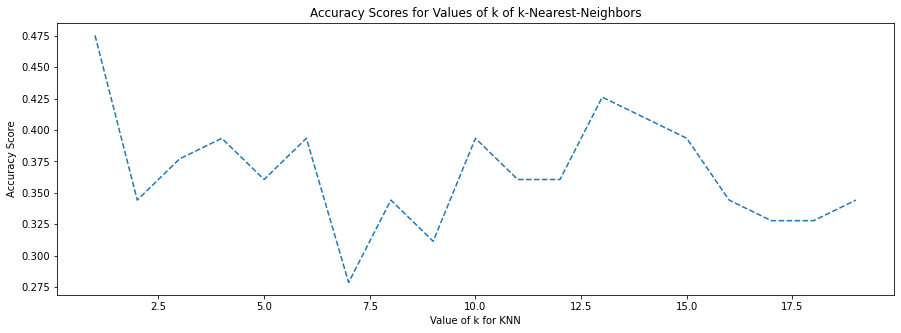

In [12]:
# import KNN model as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt # library for plotting
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')
# line required for inline charts/plots
%matplotlib inline

# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k)
    # input the train data to train KNN
    knn.fit(x_train,y_train)
    # see KNN prediction by inputting the test data
    y_pred=knn.predict(x_test)
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))

plt.figure(2,figsize=(15,5))
    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The result showed that the highest accuracy obtained by KNN is when **k = 1 (accuracy = 0.475)**

Important parameters of KNN includes weighting function and neighbour computing algorithm. The **weighting** function is used (`uniform` by default). which controls the way in which the training data is stored and searched. The previous example is based on *distance* measure. Its also important to consider the **algorithm** to compute the neighbours (`auto` by default). By default, `uniform` distance is used. The following are the typical weighting function and algorithm to compute the neighbours:

-  **Weighting** functions used in prediction
    -  `uniform`: all points in each neighborhood are weighted equally.
    -  `distance`: weight points by the inverse of their distance.
-  **Algorithm** to compute the neighbours
    -  `ball_tree`: binary tree search in *D* dimensional hyperspheres.
    -  `kd_tree`: binary tree search in *k* dimensional planes.
    -  `brute`: a brute-force search.
    -  `auto`: the most appropriate algorithm is decided based on the values passed to `fit` method.
    
The following is code for application of KNN with specific parameters:

The optimal number of neighbors is 10
The optimal score is 0.54


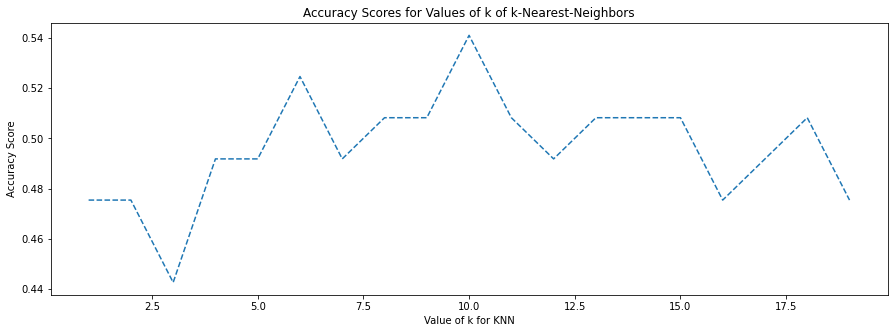

In [13]:
# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    # input the train data to train KNN
    knn.fit(x_train,y_train)
    # see KNN prediction by inputting the test data
    y_pred=knn.predict(x_test)
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The result showed that the highest accuracy obtained by KNN using *distance* weighting function is when **k = 10 (accuracy = 0.54)**. Although it is *better* than the default KNN, the *accuracy* of the classifier is still **poor**.

To address this, we need to conduct some *tuning* on the KNN parameter by using **cross-validation**. Obviously, the best *k* is the one that corresponds to the lowest test error rate, so let’s suppose we carry out repeated measurements of the test error for different values of *k*. Inadvertently, what we are doing is using the *test set* as a *training set*! This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. Our model is then *incapable* of generalizing to newer observations, a process known as **overfitting**. Hence, touching the test set is out of the question and must only be done at the very end of our pipeline.

An alternative and smarter approach involves estimating the *test error rate* by holding out a subset of the training set from the fitting process. This subset, called the *validation* set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called **k-fold cross validation**.

K-fold cross validation (the *k* is totally unrelated to *K* of KNN) involves randomly dividing the training set into *k* groups, or folds, of approximately equal size. The first fold is treated as a *validation set*, and the method is fit on the remaining *k−1* folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated *k* times; each time, a different group of observations is treated as a *validation set*. This process results in *k* estimates of the test error which are then averaged out.

*Cross-validation* can be used to estimate the test error associated with a learning method in order to **evaluate** its performance, or to select the appropriate level of *flexibility*. *Scikit* learn comes in handy with its `cross_val_score()` method. We specifiy that we are performing *5* folds with the *cv=5* parameter and that our scoring metric should be **accuracy** since we are in a classification setting.

The optimal number of neighbors is 10
The optimal score is 0.57


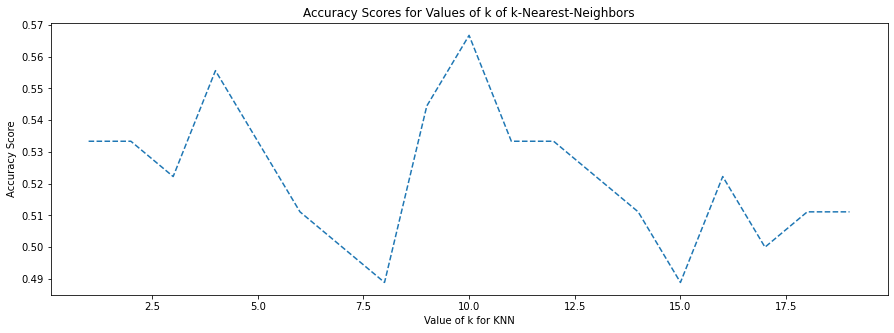

In [14]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score

# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    # get score for the 10 fold cross validation
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
    
plt.figure(2,figsize=(15,5))
    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

That's some sample you can refer to. This is just a basic sample, where we assumed that the data didn't have any potential issues. It is well balanced, normally distributed and didn't contain any outliers.

Other option you can do to improve further your accuracy might be by looking at any outlier exist in the data, doing some transformation on it, etc.

Happy learning :)